In [118]:
%load_ext autoreload
%autoreload 2
import networkx as nx
from cdt.metrics import *
import os
os.environ['R_HOME'] = 'C:\Program Files\R\R-4.3.1'  # replace with the actual R home directory
import rpy2.robjects as robjects
is_installed = robjects.r('''
if (!is.null(find.package("pcalg", quiet = TRUE))) {
  TRUE
} else {
  FALSE
}
''')
if is_installed[0]:
    print("pcalg is installed")
else:
    print("pcalg is NOT installed")
is_installed = robjects.r('''
if (!is.null(find.package("SID", quiet = TRUE))) {
  TRUE
} else {
  FALSE
}
''')
if is_installed[0]:
    print("SID is installed")
else:
    print("SID is NOT installed")
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
pcalg is installed
SID is installed


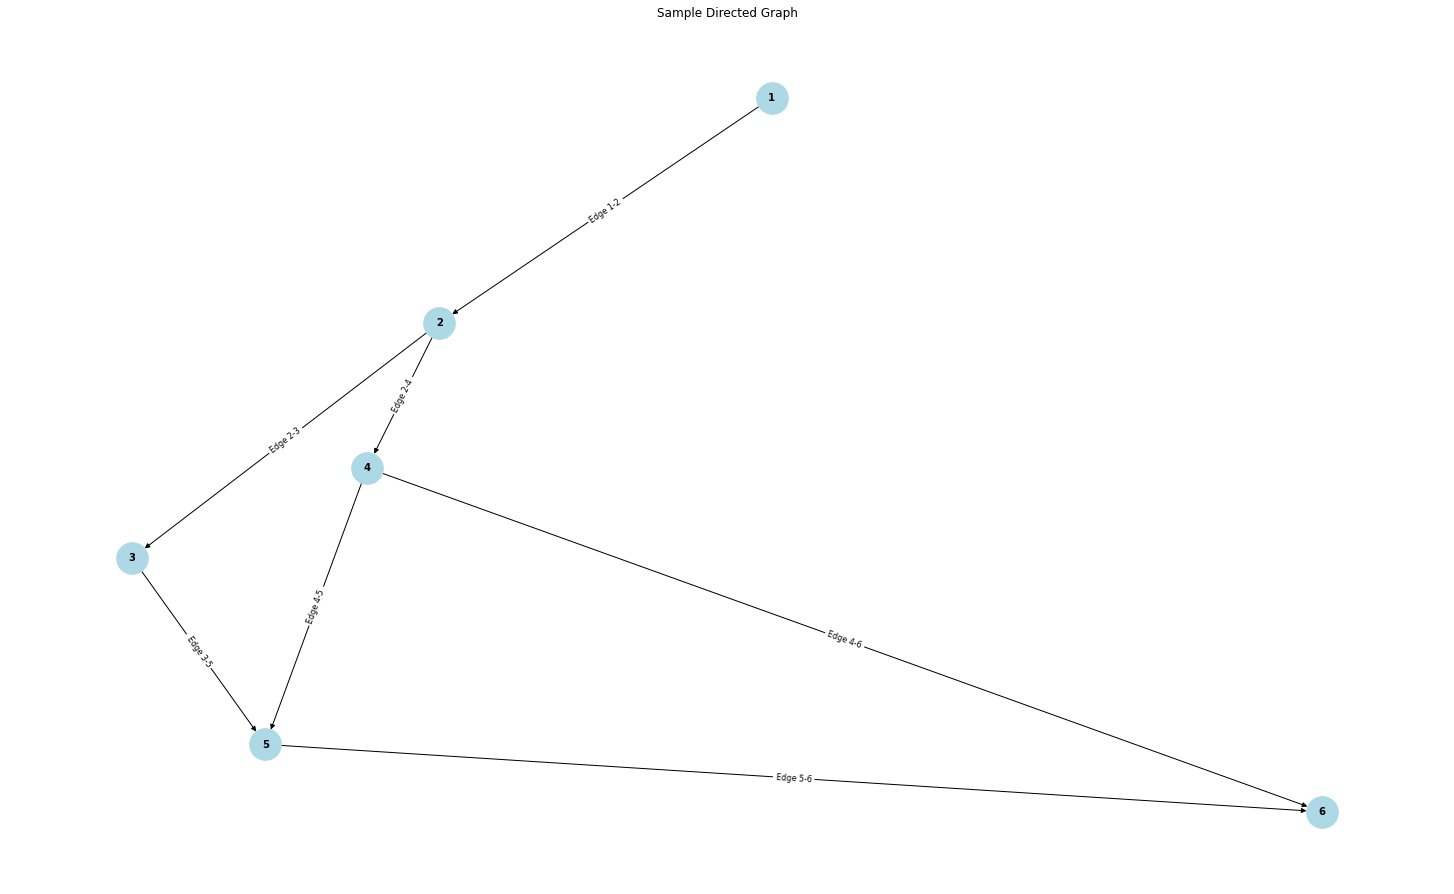

In [119]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = [1, 2, 3, 4, 5, 6]
G.add_nodes_from(nodes)

# Add edges
edges = [(1, 2), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (5, 6)]
G.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)  # Layout algorithm
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(1, 2): 'Edge 1-2', (2, 3): 'Edge 2-3', (2, 4): 'Edge 2-4', (3, 5): 'Edge 3-5', (4, 5): 'Edge 4-5', (4, 6): 'Edge 4-6', (5, 6): 'Edge 5-6'}, font_size=8)
plt.title("Sample Directed Graph")
plt.show()

In [120]:
adj_matrix = nx.to_numpy_array(G, nodelist=nodes, dtype=int)
adj_matrix

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0]])

In [121]:
import os
os.environ['R_HOME'] = 'C:\Program Files\R\R-4.3.1'  # replace with the actual R home directory
import rpy2.robjects as robjects

In [122]:
pi = robjects.r['pi']
print(pi[0])

3.141592653589793


In [123]:
from rpy2.robjects.packages import importr
pcalg = importr('pcalg')

In [124]:
cpdag_adj = get_CPDAG(adj_matrix)
cpdag_adj

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [125]:
experiment_folder = 'clustercausal\experiments\_results\ClusterPC_30min\erdos_renyi_10_nodes_30_edges_3_clusters_mim'
base_est, cluster_est, cluster_dag = load_experiment_graphs(experiment_folder)
metrics = load_experiment(experiment_folder)

In [126]:
# cluster_dag.cdag_to_mpdag()
causalgraph = cluster_est
causalgraph.G.graph

array([[ 0,  0,  0,  1,  0, -1,  0, -1, -1,  0],
       [ 0,  0,  1,  1,  0, -1,  1, -1, -1, -1],
       [ 0, -1,  0,  0, -1,  0, -1,  0,  0,  0],
       [-1, -1,  0,  0,  0, -1,  0, -1, -1,  0],
       [ 0,  0,  1,  0,  0,  0,  1, -1,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  1,  0,  0, -1],
       [ 0, -1, -1,  0, -1, -1,  0, -1, -1,  0],
       [ 1,  1,  0,  1,  1,  0,  1,  0,  1, -1],
       [ 1,  1,  0,  1,  0,  0,  1, -1,  0, -1],
       [ 0,  1,  0,  0,  0,  1,  0,  1,  1,  0]])

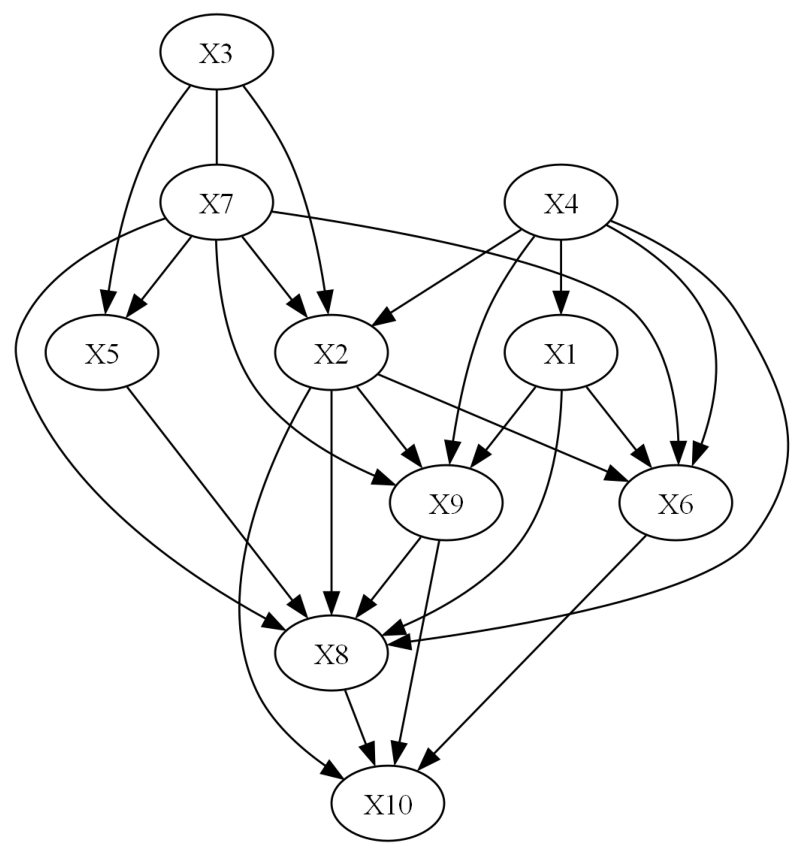

In [127]:
causalgraph.draw_pydot_graph()

In [128]:
nx_adjmat = causallearn_to_nx_adjmat(causalgraph.G.graph)
nx_adjmat

array([[0., 0., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

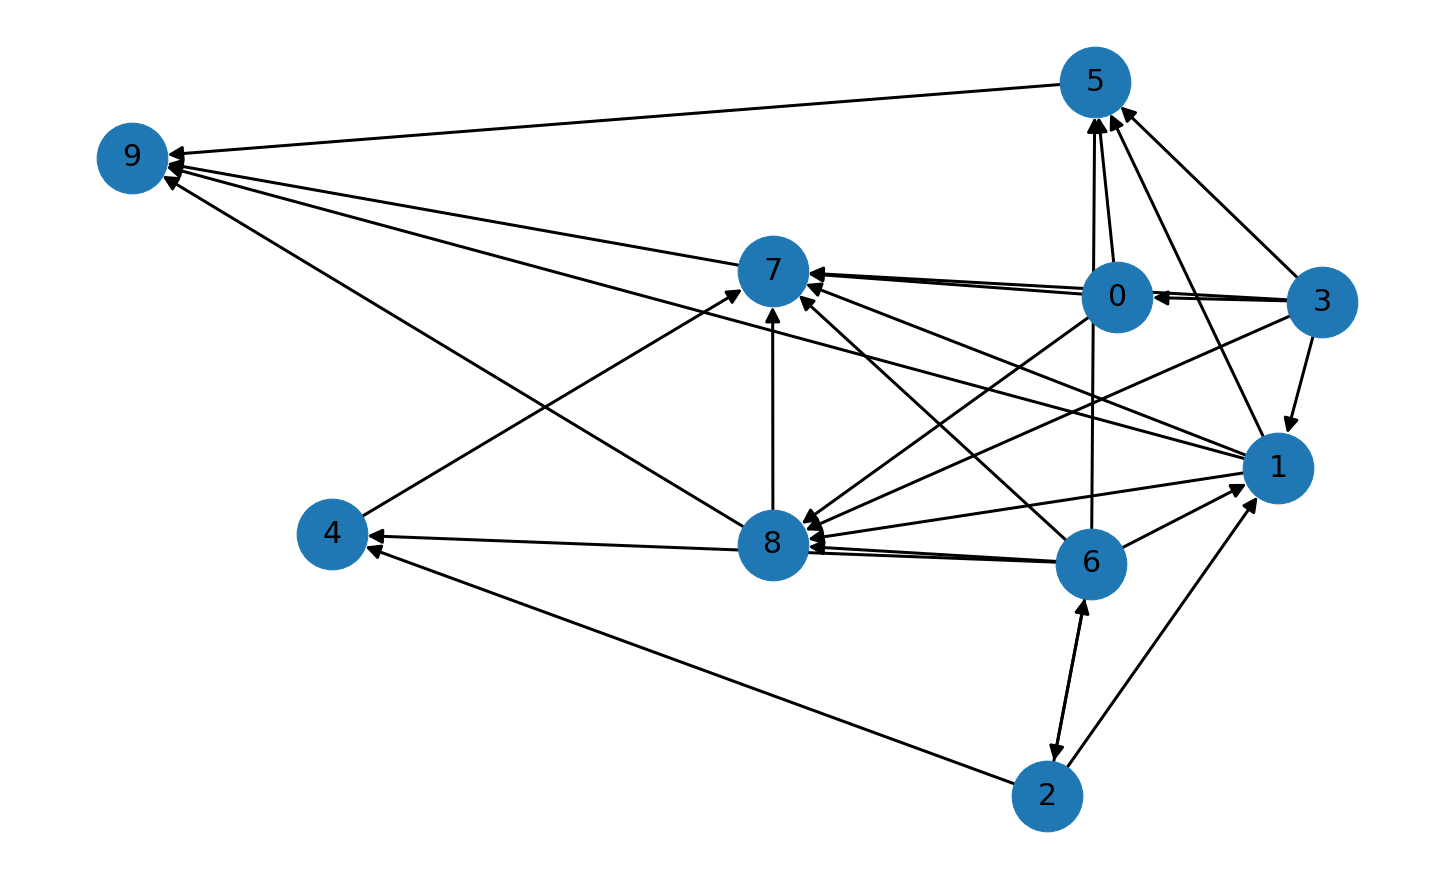

In [129]:
nx_graph = nx.DiGraph(nx_adjmat)
nx.draw(nx_graph, with_labels=True, node_size = 5000, font_size = 30, width = 3, arrowsize = 30)

In [130]:
nx_cluster_est_cpdag = get_CPDAG(causallearn_to_nx_adjmat(cluster_est.G.graph))
nx_true_dag = causallearn_to_nx_adjmat(cluster_dag.true_dag.G.graph)

In [131]:
nx_true_dag

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [132]:
sid_lower, sid_upper = SID_CPDAG(nx_true_dag, nx_cluster_est_cpdag)
print(sid_lower, sid_upper)

41.0 64.0


In [133]:
sid_lower, sid_upper = SID_CPDAG(nx_true_dag, nx_true_dag)
print(sid_lower, sid_upper)

0.0 0.0


In [134]:
nx_true_dag


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [135]:
retrieve_adjacency_matrix(nx_true_dag) == nx_true_dag

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [136]:
import numpy as np
adjmat1 = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])
adjmat2 = np.array([
    [0, 1, 1, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])

In [137]:
import numpy as np
adjmat1 = np.array([
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 0]
])
adjmat2 = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [1, 0, 0]
])
adjmat3 = np.array([
    [0, 0, 0],
    [1, 0, 1],
    [0, 0, 0]
])

In [138]:
adjmat1 = adjmat1
adjmat2 = adjmat2
sid_score = SID(adjmat1, adjmat2)
shd_score = SHD(adjmat1, adjmat2)
print(sid_score)
print(shd_score)
sid_score = SID(adjmat1, adjmat3)
shd_score = SHD(adjmat1, adjmat3)
print(sid_score)
print(shd_score)

3.0
2
1.0
2


In [139]:
sid_lower, sid_upper = SID_CPDAG(adjmat2, get_CPDAG(adjmat2))
print(sid_lower, sid_upper)

0.0 6.0


In [140]:
from clustercausal.utils.Utils import *
experiment_folder = 'clustercausal\experiments\_results\ClusterPC_2023-08-18 01-18-27.870737\hierarchical_40_nodes_63_edges_3_clusters_gauss'
base_est_graph, cluster_est_graph, cluster_dag = load_experiment_graphs(experiment_folder)

In [147]:
from clustercausal.utils.Utils import *
experiment_folder = 'clustercausal\experiments\_results\ClusterPC_30min\erdos_renyi_10_nodes_30_edges_3_clusters_mim'
base_est_graph, cluster_est_graph, cluster_dag = load_experiment_graphs(experiment_folder)

In [148]:
nx_true_dag = causallearn_to_nx_adjmat(cluster_dag.true_dag.G.graph)
nx.is_directed_acyclic_graph(nx.DiGraph(nx_true_dag))

True

In [149]:
sid_score = SID(nx_true_dag, nx_true_dag)
print(sid_score)
sid_lower, sid_upper = SID_CPDAG(nx_true_dag, get_CPDAG(nx_true_dag))
print(sid_lower, sid_upper)
sid_lower, sid_upper = SID_CPDAG(nx_true_dag, get_CPDAG(causallearn_to_nx_adjmat(base_est_graph.G.graph)))
print(sid_lower, sid_upper)
sid_lower, sid_upper = SID_CPDAG(nx_true_dag, get_CPDAG(causallearn_to_nx_adjmat(cluster_est_graph.G.graph)))
print(sid_lower, sid_upper)

0.0
0.0 14.0
80.0 83.0
41.0 64.0


In [143]:
def swap_rows_and_columns(matrix):
    # Swap 1st and 3th rows
    matrix[[0,2]] = matrix[[2,0]]
    # Swap 1st and 3th columns
    matrix[:, [0,2]] = matrix[:, [2,0]]
    return matrix
adjmat1 = swap_rows_and_columns(adjmat1)
adjmat2 = swap_rows_and_columns(adjmat2)
adjmat1 = adjmat1
adjmat2 = adjmat2
sid_score = SID(adjmat1, adjmat2)
sid_score

array(3.)

In [144]:
sid_lower, sid_upper = SID_CPDAG(adjmat2, adjmat2)
print(sid_lower, sid_upper)

0.0 0.0


In [145]:
adjmat1 = adjmat1
adjmat2 = adjmat2
sid_lower, sid_upper = SID_CPDAG(get_CPDAG(adjmat1), adjmat2)
print(sid_lower, sid_upper)

3.0 3.0


In [146]:
sid_lower, sid_upper = SID(nx_true_dag, nx_true_dag)
print(sid_lower, sid_upper)

TypeError: iteration over a 0-d array